In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
#load training and testing data
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 95s 4us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


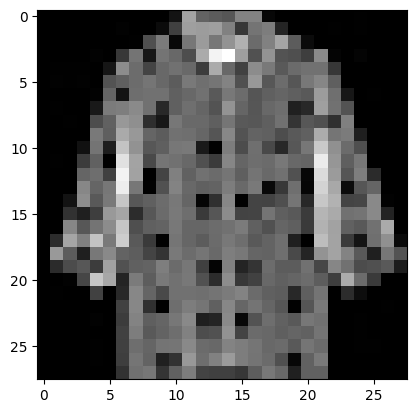

In [10]:
import numpy as np
import matplotlib.pyplot as plt
index =560
plt.imshow(train_images[index], cmap='gray')

[[  0   0   0   0   0   0   0   0   0   0  19 164  99  92  86 132 132   7   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   2   0   0  11  64 159 156 159 129  55 116 125  37   0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   1  79 123   8 119 155 119 147 177 107 129 165  92  11   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0  56 116  22 116 104  77 171 244 255 159  82 147  83  79  62 138   4   0   4   0   0   0]
 [  0   1   1   1   0  22 140 108  68 104 113 105  61 171 104  65 140 122  90 107 113 114  55   0   0   0   0   0]
 [  0   2   1   2   0  83  95 108 117 104  92 122 111 117 131  80 152  87 108  86 120 134  95   0   0   0   0   0]
 [  0   0   0   0   2 101  19 110 114 114  96 104 113  89 120 108  85  96 101  95  90 156 111  23   0   1   0   0]
 [  0   1   0   0  25 123 126 138 113  41  96 111 101  83 147 101  86 104 110  32  41 159 113  83   0   0   0   0]
 [  0   0   1   0  77  98 152 143  46  23 119 105 105  95 117  90  87  95 113  5

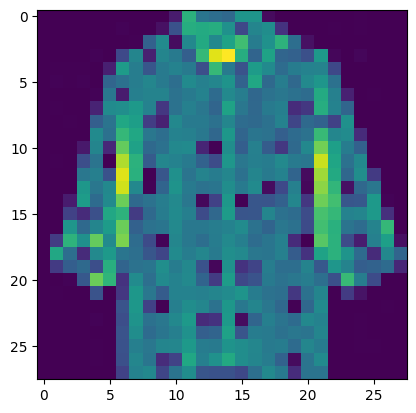

In [11]:
np.set_printoptions(linewidth=320)
print(train_images[index])
print(train_labels[index])
plt.imshow(train_images[index])

In [12]:
#normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
#build classification model
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      ])


In [14]:
#Declare sample input and convert it to a tensor
inputs = np.array([[1.0,4.0,2.0]])
inputs= tf.convert_to_tensor(inputs, dtype=tf.float32)
print(f'input to sonftmax: {inputs.numpy()}')

#Feed the input to the softmax layer
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax: {outputs.numpy()}')

# Get the sum of of all  values after softmax
sum_outputs = tf.reduce_sum(outputs)
print(f'sum of softmax output: {sum_outputs}')

#Get the index of the maximum value
index_of_max = tf.argmax(outputs)
print(f'index of maximum value: {index_of_max}')


input to sonftmax: [[1. 4. 2.]]
output of softmax: [[0.04201007 0.8437947  0.11419519]]
sum of softmax output: 0.9999999403953552
index of maximum value: [0 0 0]


In [15]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7833 - loss: 0.6254
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8597 - loss: 0.3888
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8738 - loss: 0.3454
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8840 - loss: 0.3145
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8913 - loss: 0.2947


In [16]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3890
Test accuracy: 0.8644000291824341
